In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load the dataset
!mkdir data/
!wget https://raw.githubusercontent.com/chinmoyee-s/red-wine-quality-analysis/main/winequality-red.csv
wine = pd.read_csv('winequality-red.csv')

--2024-09-02 17:45:41--  https://raw.githubusercontent.com/chinmoyee-s/red-wine-quality-analysis/main/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.001s  

2024-09-02 17:45:42 (122 MB/s) - ‘winequality-red.csv’ saved [100951/100951]



In [3]:
# Display the first few rows of the dataset
print("First 5 entries:\n", wine.head())

First 5 entries:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2 

In [4]:
# Check for missing values
print("\nMissing values:\n", wine.isnull().sum())


Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [5]:
# Summary statistics
print("\nSummary statistics:\n", wine.describe())


Summary statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000        

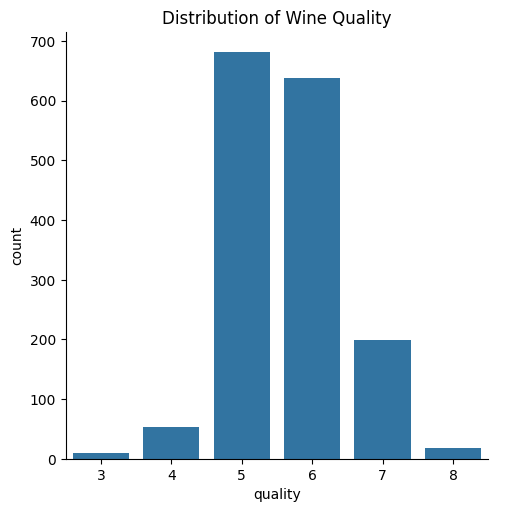

In [6]:
# Plot the count of each wine quality
sns.catplot(x='quality', data=wine, kind='count')
plt.title('Distribution of Wine Quality')
plt.show()

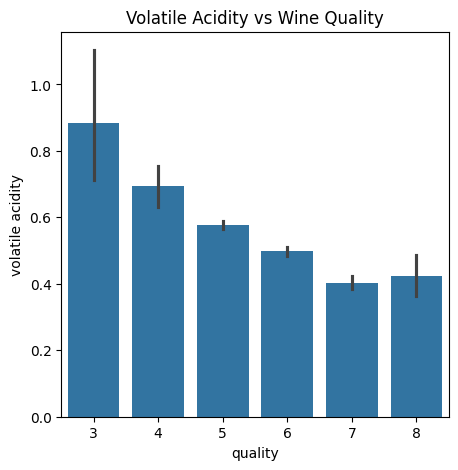

In [7]:
# Plot volatile acidity vs wine quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine)
plt.title('Volatile Acidity vs Wine Quality')
plt.show()

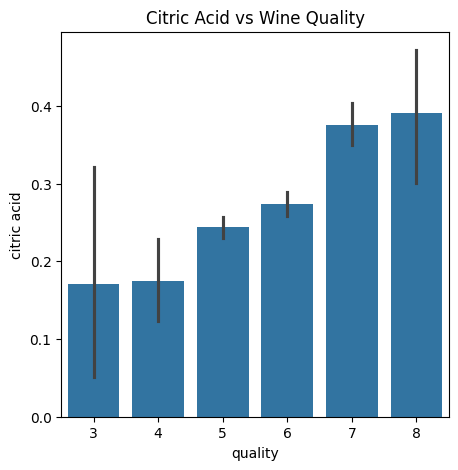

In [8]:
# Plot citric acid vs wine quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data=wine)
plt.title('Citric Acid vs Wine Quality')
plt.show()

In [9]:
# Compute correlation matrix
correlation = wine.corr()

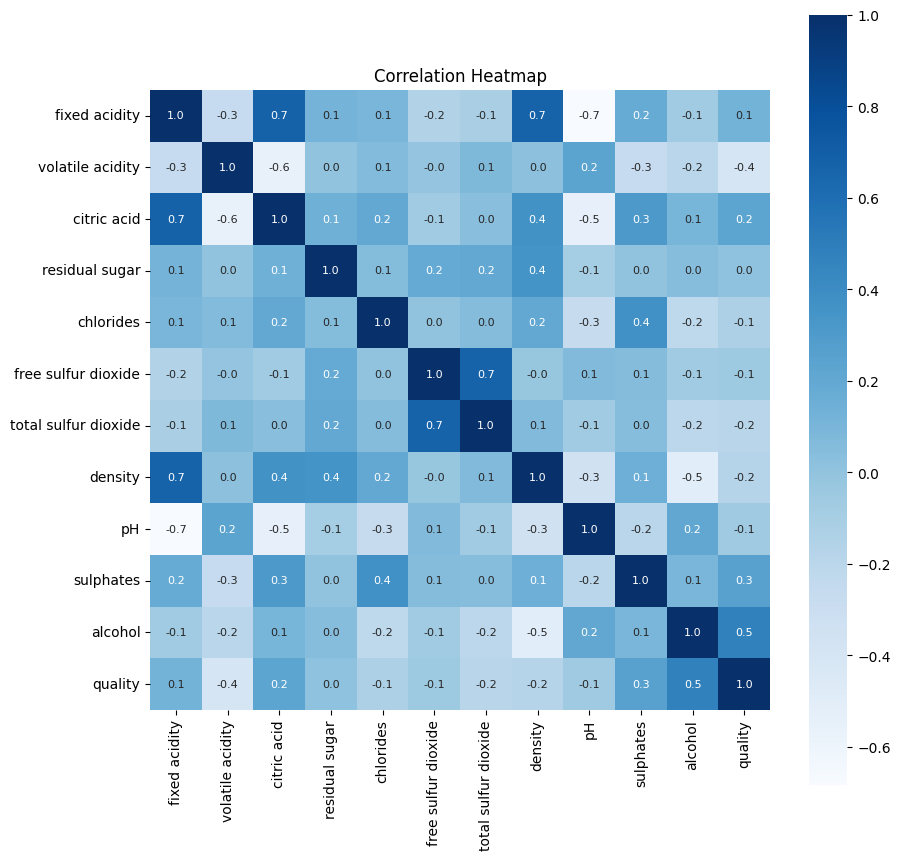

In [10]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, square=True, fmt=".1f", annot_kws={"size":8}, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
# Split data into features and target variable
X = wine.drop('quality', axis=1)
y = (wine['quality'] >= 7).astype(int)

In [12]:
# Display the distribution of the target variable
print("\nTarget variable distribution:\n", y.value_counts())


Target variable distribution:
 quality
0    1382
1     217
Name: count, dtype: int64


In [13]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
# Print the shapes of the target variable and its splits
print("\nShapes:\n", y.shape, Y_train.shape, Y_test.shape)


Shapes:
 (1599,) (1279,) (320,)


In [15]:
# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=3)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=3)

In [16]:
# Predict on the test data
X_test_prediction = model.predict(X_test)

In [17]:
# Calculate and print the accuracy
accuracy = accuracy_score(X_test_prediction, Y_test)
print("\nAccuracy on test data:", accuracy)


Accuracy on test data: 0.934375


In [18]:
# Perform cross-validation for a more robust evaluation
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.875      0.846875   0.8875     0.853125   0.87147335]
Mean CV Score: 0.8667946708463949


In [19]:
# Display classification report
print("\nClassification Report:\n", classification_report(Y_test, X_test_prediction))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       283
           1       0.79      0.59      0.68        37

    accuracy                           0.93       320
   macro avg       0.87      0.79      0.82       320
weighted avg       0.93      0.93      0.93       320



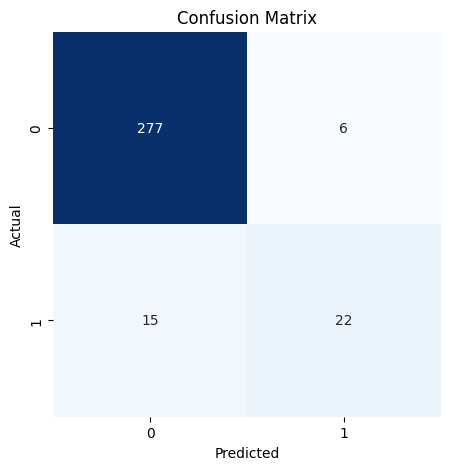

In [20]:
# Display confusion matrix as a heatmap
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
# Display the best parameters from GridSearchCV
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)

In [ ]:
# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
X_test_prediction_best = best_model.predict(X_test)
best_accuracy = accuracy_score(X_test_prediction_best, Y_test)
print("\nBest Model Accuracy on Test Data:", best_accuracy)